# Markov Lokalisation

## Hintergrund


## Aufgabe

Ziel der Aufgabe ist die erfolgreiche Implementation der Markov Lokalisation.


Zur Aufgabe:

Gegeben ist ein 1D Array der länge `len`, auf welchem sich ein `Agent` nach rechts, links oder gar nicht bewegen kann. Es kann nach jedem Schritt eine Messung durchgeführt werden.

\begin{align*}
       z \in &\ \{wall, way\} \\
       x \in &\  \mathbb{N}^{<len} \\
       u \in &\ [-1, 0, 1]
\end{align*}

Folgendes sind die Wahrscheinlichkeiten für die Messwerte:

\begin{align*}
   &&\     p(z='wall' | x=0) &\ = 0.8 \\
    &&\    p(z='way' | x=0) &\  = 0.2 \\
    &&\    p(z='wall' | x=len-1) &\  = 0.8 \\
   &&\     p(z='way' | x=len-1) &\  = 0.2 \\
   &&\     p(z='wall' | 0 < x < len-1) &\  = 0.05 \\
   &&\     p(z='way' | 0 < x < len-1) &\  = 0.95
\end{align*}

Folgendes sind die erlaubten Bewegungsmuster des `Agent`s:

- wenn er sich nicht am rand des Arrays befindet, kann er sich in jede Richtung `u` bewegen.
- wenn er sich am linken Rand befindet und nach links geht, verändert er die Position nicht
- wenn er sich am rechten Rand befindet und nach rechts geht, verändert er die Position nicht

Dieser Mechanismus ist duch folgende Wahrscheinlichkeitsverteilungen gegeben:

\begin{align*}
 &&\     p( x_t = x_{t-1} |  u_t = 0 , x_{t-1})  &\ = 1 \\

  &&\    p( x_t = x_{t-1} |  u_t = -1 , x_{t-1} = 0) &\  = 1 \\
   &&\   p( x_t = x_{t-1} |  u_t = 1 , x_{t-1} = len-1) &\  = 1 \\

   &&\   p( x_t = x_{t-1}+1 |  u_t = 1 , x_{t-1} < len-1) &\  = 1 \\
  &&\    p( x_t = x_{t-1}-1 |  u_t = -1 , x_{t-1} > 0) &\  = 1 \\

\end{align*}

Für alle verbleibenden Konfigurationen von $$x_t, u_t, x_{t-1}$$ ist die Wahrscheinlichkeit null.

Implementieren Sie die Klasse `Agent`, die die Methoden `p_x, p_z, predict` und `update` besitzt. Die `update` Methode soll die geglaubte State Wahrscheinlichkeitsverteilen $b(x_t)` (`self.bel$) updaten. `self.bel` wird beim iterativen Aufruf von `Agent` verwendet um die Ergebnisse darzustellen.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Folgendes ist das Environemnt, welches den Schritt entgegen nimmt und Sensordaten zurück gibt. Sie dürfen nicht auf die `_pos` Eigenschaft zugreifen.

In [2]:
class Environment:

    def __init__(self, size):
        self.arr = np.zeros(size)
        self.size = size
        self._pos = random.randint(0, size - 1)

    def step(self, u):
        if self._pos == 0 and u == -1 or self._pos == self.size - 1 and u == 1:
            return

        self._pos += u

    def sense(self):
        is_wall = self._pos == 0 or self._pos == self.size - 1

        if is_wall:
            return 'wall'
        else:
            return 'way'

In [3]:
class Agent:

    def __init__(self, env):
        self.env = env
        self.bel = [1 / env.size for _ in range(env.size)]
        self.u = [1, 0, -1]
        self.x = list(range(env.size))
        self.z = ['wall', 'way']
        self.last = env.size - 1

    def p_z(self, z, x):
        """
        properbility distribution of sensor data z for given position x

        :param z: str (Sensor data 'wall' or 'way')
        :param x: int (Position)
        :return: int (propability [0,1])
        """
        # your code here

    def p_x(self, x_next, x, u) -> int:
        """
        properbility distribution of x_t given control-action u_t and last position x_t-1

        :param x_next: int (next position)
        :param x: int (last position)
        :param u: int (control-action 0,1 or -1)
        :return: int (propability [0,1])
        """
        # your code here
        pass

    def predict(self, x_next, u) -> int:
        """
        Predicts the next belief state given the current belief state and the action

        :param x_next: the next state
        :param u: the action
        """
        # your code here
        pass

    def update(self, z, predicted_bel):
        """
        Updates the belief state given the current belief state and the observation

        :param z: the observation
        :param predicted_bel: the predicted belief state
        """
        # your code here
        pass


    def __iter__(self):
        self.steps = [0] + [random.choice(self.u)
                            for _ in range(self.num_steps - 1)]

        self.i = 0
        return self

    def __next__(self):
        if self.i < len(self.steps):

            u = self.steps[self.i]
            self.env.step(u)
            predicted_bel = [self.predict(x, u) for x in self.x]
            z = self.env.sense()
            self.update(z, predicted_bel)

            self.i += 1

            return self.bel, self.env._pos
        raise StopIteration

    def __call__(self, num_steps=9):
        self.num_steps = num_steps
        return self

In [4]:
class AgentVizualizer:

    def __init__(self, agent, num_steps=9):
        self.agent = agent
        self.num_steps = num_steps
        self.size = self.agent.env.size - 1

    def interpol_bel(self, bel):
        x = np.linspace(0, self.size, len(bel))
        y = bel
        f = interp1d(x, y, kind='nearest', fill_value='extrapolate')
        x_new = np.linspace(0, self.size, 100)
        y_new = f(x_new)
        return x_new, y_new

    def __call__(self, ):
        fig, axs = plt.subplots(self.num_steps // 3, 3, figsize=(10, 10))

        axs_flat = axs.flatten()
        for i, (bel, pos) in enumerate(self.agent(self.num_steps)):
            ax = axs_flat[i]

            x, y = self.interpol_bel(bel)
            ax.scatter(pos, 0, color='red')
            ax.plot(x, y, color='blue')
            ax.set_ylim(0, 1)
            ax.set_xlim(0, len(bel) - 1)
            ax.set_title(f'step {i}')
            ax.grid()

        plt.show()

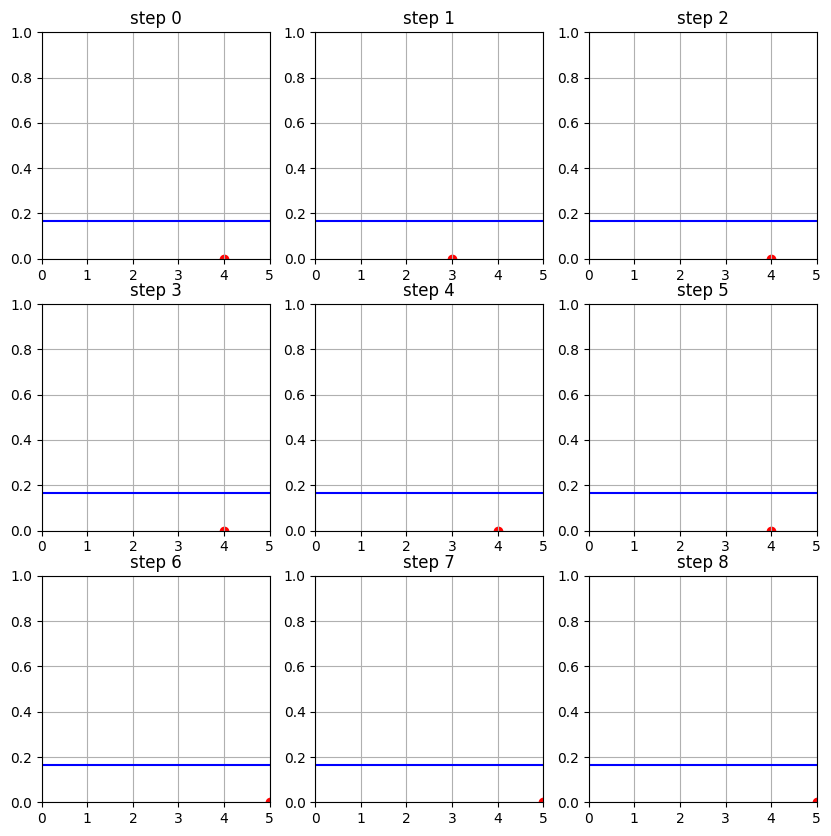

In [5]:
def main():
    env = Environment(6)
    markov = Agent(env)
    AgentVizualizer(markov, num_steps=9)()


if __name__ == '__main__':
    main()

Folgendes ist ein Beispielergebnis:

![markov](markov-example.png)